# Results analysis

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import requests

## Data description

- Binome 1&2 : Authors of the repository
- Git : Link to the github repository of the associativity experimentation
- NRep : Number of repetitons for computing the ratio of associative operations (gathered manually by looking at the code) 

In [49]:
repos = pd.read_csv("repos.csv", )
repos

,Binome1,Binome2,Sujet,Git,NRep
0,Matys Couroussé,Axel Homery,Sujet 2,https://github.com/Matys53/REP_TP,1000000
1,Solène Lemonnier,Pauline Roches,Sujet 2,https://github.com/PaulineRoches/REP_popo_sos,50000
2,Chenyu Li,Bohan Ha,Sujet 3,https://github.com/l55I1/REP,1000000
3,Victor van Kempen,Matthieu Hillairet,Sujet 1,https://github.com/matth1446/rep_mh_vvk,100
4,Antoine MARCHAL DOMBRAT,Jean Haurogné 🤓,Sujet 1,https://github.com/AntoineMarchalDombrat/REP_A...,100000
5,Ezgi Ozel,Alp Jakop,Sujet 2,https://github.com/alpjakop/REP,1000000
6,Noé Bourmalo,Aidan Gallagher,Sujet 2,https://github.com/Humilokaki/TP2-REP-INSA-202425,512
7,Jeremy Brunet,Arno Lecrivain,Sujet 2,https://github.com/Mistyycs/REP-TP2,1000
8,Noa Berton,Guillaume Freyermuth,Sujet 1,https://github.com/Kaeios/assoc-REP/,100
9,Alexis Simon,Malvin Chevallier,Sujet 3,https://github.com/Dyskal/repro,125000


## Retrieving of results in the repositories

In [55]:
results = []

# Get results
for url in repos["Git"]:
    url_master = url.replace("github.com", "raw.githubusercontent.com") + "/refs/heads/master/answer_associativity.txt"
    response = requests.get(url_master)
    if response.status_code == 200:
        results.append(response.text.strip())
    else:
        url_main = url.replace("github.com", "raw.githubusercontent.com") + "/refs/heads/main/answer_associativity.txt"
        response = requests.get(url_main)
        if response.status_code == 200:
            results.append(response.text.strip())
        else:
            print(f"Can't find answer_associativity.txt on repository {url}")
            results.append("")

repos["results"] = results

Can't find answer_associativity.txt on repository https://github.com/l55I1/REP
Can't find answer_associativity.txt on repository https://github.com/Humilokaki/TP2-REP-INSA-202425


In [56]:
repos

,Binome1,Binome2,Sujet,Git,NRep,results
0,Matys Couroussé,Axel Homery,Sujet 2,https://github.com/Matys53/REP_TP,1000000,93.11
1,Solène Lemonnier,Pauline Roches,Sujet 2,https://github.com/PaulineRoches/REP_popo_sos,50000,92.45
2,Chenyu Li,Bohan Ha,Sujet 3,https://github.com/l55I1/REP,1000000,
3,Victor van Kempen,Matthieu Hillairet,Sujet 1,https://github.com/matth1446/rep_mh_vvk,100,79.71
4,Antoine MARCHAL DOMBRAT,Jean Haurogné 🤓,Sujet 1,https://github.com/AntoineMarchalDombrat/REP_A...,100000,77.30
5,Ezgi Ozel,Alp Jakop,Sujet 2,https://github.com/alpjakop/REP,1000000,100.00
6,Noé Bourmalo,Aidan Gallagher,Sujet 2,https://github.com/Humilokaki/TP2-REP-INSA-202425,512,
7,Jeremy Brunet,Arno Lecrivain,Sujet 2,https://github.com/Mistyycs/REP-TP2,1000,82.79
8,Noa Berton,Guillaume Freyermuth,Sujet 1,https://github.com/Kaeios/assoc-REP/,100,100.00
9,Alexis Simon,Malvin Chevallier,Sujet 3,https://github.com/Dyskal/repro,125000,78.48


## Data cleanup & filtering

In [57]:
# Parse floats
repos = repos[pd.to_numeric(repos["results"], errors="coerce").notna()]
repos["results"] = repos["results"].astype("float") / 100.0
repos.reset_index(inplace=True, drop=True)
repos

C:\Users\guill\AppData\Local\Temp\ipykernel_11816\465093398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repos["results"] = repos["results"].astype("float") / 100.0


,Binome1,Binome2,Sujet,Git,NRep,results
0,Matys Couroussé,Axel Homery,Sujet 2,https://github.com/Matys53/REP_TP,1000000,0.9311
1,Solène Lemonnier,Pauline Roches,Sujet 2,https://github.com/PaulineRoches/REP_popo_sos,50000,0.9245
2,Victor van Kempen,Matthieu Hillairet,Sujet 1,https://github.com/matth1446/rep_mh_vvk,100,0.7971
3,Antoine MARCHAL DOMBRAT,Jean Haurogné 🤓,Sujet 1,https://github.com/AntoineMarchalDombrat/REP_A...,100000,0.7730
4,Ezgi Ozel,Alp Jakop,Sujet 2,https://github.com/alpjakop/REP,1000000,1.0000
5,Jeremy Brunet,Arno Lecrivain,Sujet 2,https://github.com/Mistyycs/REP-TP2,1000,0.8279
6,Noa Berton,Guillaume Freyermuth,Sujet 1,https://github.com/Kaeios/assoc-REP/,100,1.0000
7,Alexis Simon,Malvin Chevallier,Sujet 3,https://github.com/Dyskal/repro,125000,0.7848


In [59]:
p_values = np.ones((len(repos), len(repos)))

for i in range(len(repos)):
    for j in range(i, len(repos)):
        sd1 = np.sqrt(repos["NRep"][i]) *np.sqrt(repos["results"][i]*(1-repos["results"][i])) * ((repos["NRep"][i] + 1) / repos["NRep"][i]) if repos["results"][i] != 1.0 else 0.01
        sd2 = np.sqrt(repos["NRep"][j]) * np.sqrt(repos["results"][j]*(1-repos["results"][j])) * ((repos["NRep"][j] + 1) / repos["NRep"][j]) if repos["results"][j] != 1.0 else 0.01
        t_stat, p_val = stats.ttest_ind_from_stats(
            mean1=repos["results"][i], std1=sd1, nobs1=repos["NRep"][i],
            mean2=repos["results"][j], std2=sd2, nobs2=repos["NRep"][j],
            equal_var=False
        )
        p_values[i, j] = p_val
        p_values[j, i] = p_val

df_p_values = pd.DataFrame(p_values, columns=repos['Binome1'], index=repos['Binome1'])
df_p_values.style.format(formatter='{:.2f}', na_rep='').background_gradient(axis=None, low=0.0, high=1.0, vmin=0.95, vmax=1.0).set_caption("p-value of student significances tests")

Binome1,Matys Couroussé,Solène Lemonnier,Victor van Kempen,Antoine MARCHAL DOMBRAT,Ezgi Ozel,Jeremy Brunet,Noa Berton,Alexis Simon
Binome1,,,,,,,,
Matys Couroussé,1.00,0.99,0.78,0.75,0.79,0.82,0.79,0.76
Solène Lemonnier,0.99,1.00,0.79,0.76,0.78,0.83,0.78,0.77
Victor van Kempen,0.78,0.79,1.00,0.97,0.62,0.96,0.62,0.98
Antoine MARCHAL DOMBRAT,0.75,0.76,0.97,1.00,0.59,0.92,0.59,0.98
Ezgi Ozel,0.79,0.78,0.62,0.59,1.00,0.65,1.00,0.60
Jeremy Brunet,0.82,0.83,0.96,0.92,0.65,1.00,0.65,0.94
Noa Berton,0.79,0.78,0.62,0.59,1.00,0.65,1.00,0.60
Alexis Simon,0.76,0.77,0.98,0.98,0.60,0.94,0.60,1.00


Significance test results between our project and the others:

In [60]:
df_p_values[['Noa Berton']].T.style.format(formatter='{:.2f}', na_rep='').background_gradient(axis=None, low=0.0, high=1.0, vmin=0.95, vmax=1.0).set_caption("p-value of student significances tests for our project")

Binome1,Matys Couroussé,Solène Lemonnier,Victor van Kempen,Antoine MARCHAL DOMBRAT,Ezgi Ozel,Jeremy Brunet,Noa Berton,Alexis Simon
Binome1,,,,,,,,
Noa Berton,0.79,0.78,0.62,0.59,1.00,0.65,1.00,0.60


### Interpretation:

Generally speaking, the main variability factors are:
- Numbers internal representation (floating point, symbolic computing...) and the corresponding algorithms used by the language
- Precision (ie number of bits: float, double...)
- Amplitude of the numbers (floats provide more precision near 0.0)
- Language, librairies and other dependencies versions
- Number of trials
- Coding errors...

Our result of 100% is due to the use of VPA (variable precision arithmetic), allowing Octave to use symbolic calculus and a floating point number artihmetic that ensure associativity. This explains why our results are significantly differents than all other projects that uses IEEE

According to the P-values, the only project with a similar result is the one of Ezgi Ozel (Java). However, it is due to a coding choice : the number are generated randomly as floats, and then casted to doubles to perform the check.
We re runned their code, generating numbers directly as doubles, and we obtained an output of 82.82%.

## Variability factors exploration

We tried different values for each of the following parameters, in our Octave project:

### For 100 trials and the default predicate:

In [61]:
result1 = np.array([[0.58],
                    [0.71],
                    [1],
                    [1],
                    [1]])
pd.DataFrame(result1, columns=["VPA"], index=["1 digit", "8 digits", "16 digits", "32 digits", "64 digits"])

,VPA
1 digit,0.58
8 digits,0.71
16 digits,1.00
32 digits,1.00
64 digits,1.00


**Conclusion :** VPA seems to be less effective for preserving associativity property when used with small amount of digits. If associativity is important consider using high precision VPA

### For 100 trials, with different predicates:

In [44]:
result2 = np.array([[0.82, 1],
                    [0.85, 1]])
pd.DataFrame(result2, columns=["Float", "VPA"], index=["(x+y)+z == x+(y+z)", "((x+y)+z) - (x+(y+z)) == 0.0"])

,Float,VPA
(x+y)+z == x+(y+z),0.82,1.0
((x+y)+z) - (x+(y+z)) == 0.0,0.85,1.0


**Conclusion :** Evaluating equality of sums or nullity of sum differences seems to provide similar results when used with VPA.

100 trials is not enough to determine whether floats are affected or not.

### For 10 000 trials, with different predicates:

In [45]:
result3 = np.array([[0.8271],
                    [0.8195]])
pd.DataFrame(result3, columns=["Float"], index=["(x+y)+z == x+(y+z)", "((x+y)+z) - (x+(y+z)) == 0.0"])

,Float
(x+y)+z == x+(y+z),0.8271
((x+y)+z) - (x+(y+z)) == 0.0,0.8195


**Conclusion :** Evaluating equality of sums or nullity of sum differences seems to provide similar results.

## Factors effects visualisation

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
results = pd.read_csv("variabilityFactorsExploration.csv")
results

,Representation,Predicate,VPADigits,Result
0,VPA,comp,1.0,0.5800
1,VPA,comp,8.0,0.7100
2,VPA,comp,16.0,1.0000
3,VPA,comp,32.0,1.0000
4,VPA,comp,64.0,1.0000
5,VPA,diff,32.0,1.0000
6,float,comp,NaN,0.8271
7,float,diff,NaN,0.8195


In [4]:
X = results.loc[:, results.columns != "Result"]
y = np.array(results["Result"])

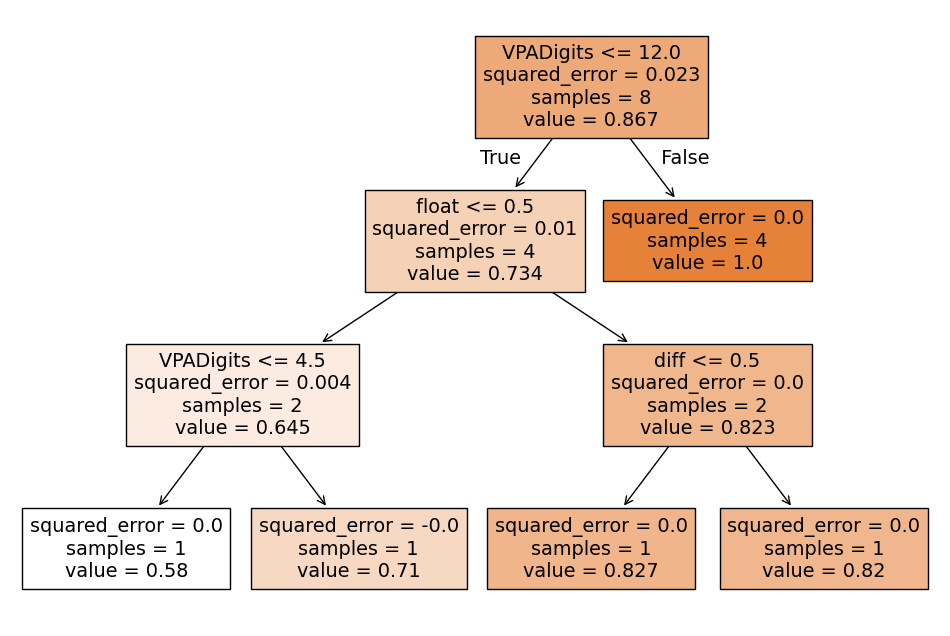

In [5]:
# Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('OneHotEncoding', OneHotEncoder(), ["Representation", "Predicate"])
    ],
    remainder="passthrough" # do not encode numerical columns
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(max_depth=10))
])

# Training
pipeline.fit(X, y)

# Tree visualisation
feature_names = [name.split('_')[-1] for name in pipeline.named_steps['preprocessor'].get_feature_names_out()]
plt.figure(figsize=(12, 8))
plot_tree(pipeline.named_steps['regressor'], feature_names=feature_names, filled=True)
plt.show()